# Simple Franca Core ML Evaluation

A streamlined notebook for evaluating Franca Core ML models.

In [2]:
# Basic imports
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import coremltools as ct

print("✅ Imports successful!")

✅ Imports successful!


In [3]:
# Load the Core ML model
model_path = "../coreml_models/franca_vitb14_in21k_fp32.mlpackage"

if os.path.exists(model_path):
    model = ct.models.MLModel(model_path)
    print(f"✅ Model loaded: {model_path}")
    
    # Show model info
    spec = model.get_spec()
    print(f"Input: {spec.description.input[0].name}")
    print(f"Output: {spec.description.output[0].name}")
else:
    print(f"❌ Model not found: {model_path}")
    print("Run ../scripts/export_coreml_hub.py first")

✅ Model loaded: ../coreml_models/franca_vitb14_in21k_fp32.mlpackage
Input: image
Output: var_625


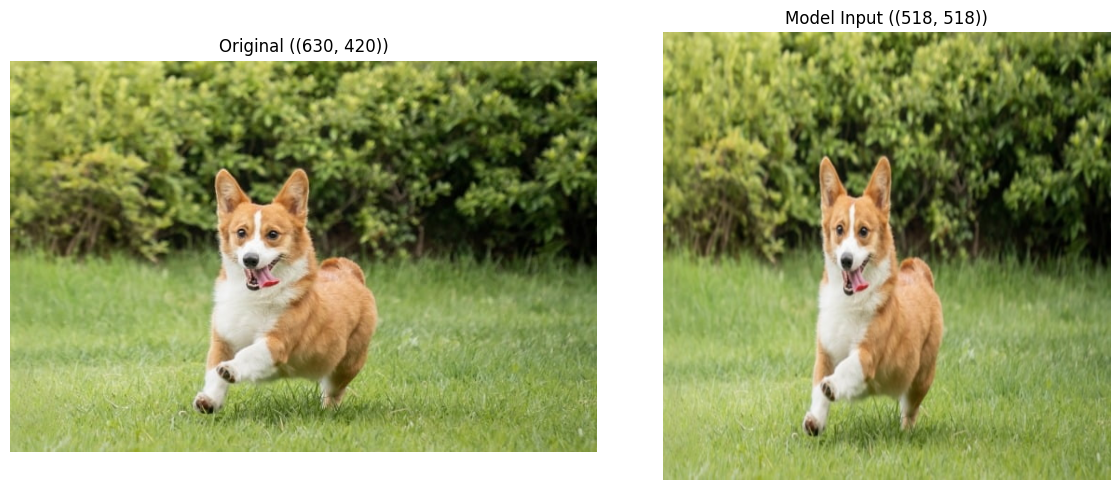

✅ Image loaded: ../assets/dog.jpg


In [4]:
# Load and display test image
image_path = "../assets/dog.jpg"

if os.path.exists(image_path):
    image = Image.open(image_path).convert('RGB')
    
    # Display original and resized
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.imshow(image)
    ax1.set_title(f"Original ({image.size})")
    ax1.axis('off')
    
    image_resized = image.resize((518, 518), Image.Resampling.BILINEAR)
    ax2.imshow(image_resized)
    ax2.set_title(f"Model Input ({image_resized.size})")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Image loaded: {image_path}")
else:
    print(f"❌ Image not found: {image_path}")
    # Create a dummy image
    image_resized = Image.new('RGB', (518, 518), color='red')
    print("Using dummy red image for testing")

In [5]:
# Run inference
print("🔍 Running Core ML inference...")

# Single inference
start_time = time.time()
result = model.predict({"image": image_resized})
inference_time = time.time() - start_time

# Get the feature vector
features = list(result.values())[0]

print(f"✅ Inference complete!")
print(f"Time: {inference_time*1000:.1f} ms")
print(f"Output shape: {features.shape}")
print(f"Output type: {features.dtype}")
print(f"Feature norm: {np.linalg.norm(features):.4f}")

🔍 Running Core ML inference...
✅ Inference complete!
Time: 821.0 ms
Output shape: (1, 768)
Output type: float32
Feature norm: 63.1118


⚡ Running performance benchmark...

📊 Performance Results:
Average: 208.3 ± 8.6 ms
Min: 197.4 ms
Max: 223.7 ms


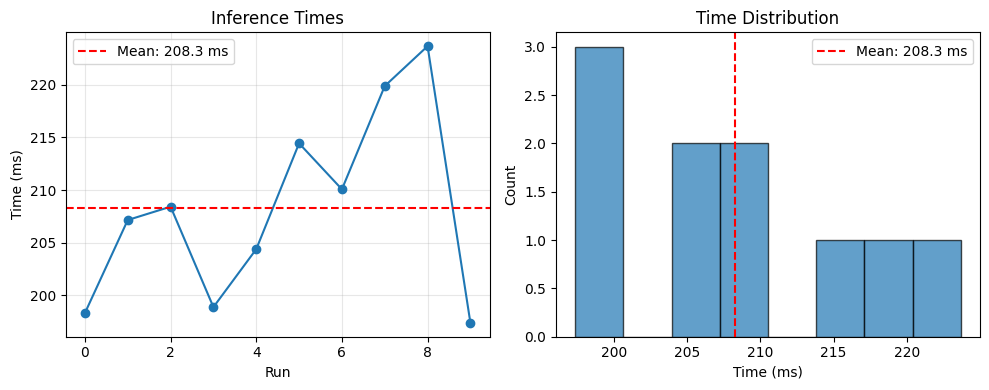

In [6]:
# Performance benchmark
print("⚡ Running performance benchmark...")

# Warmup
for _ in range(3):
    _ = model.predict({"image": image_resized})

# Benchmark
times = []
for i in range(10):
    start = time.time()
    _ = model.predict({"image": image_resized})
    times.append(time.time() - start)

times_ms = np.array(times) * 1000

print(f"\n📊 Performance Results:")
print(f"Average: {times_ms.mean():.1f} ± {times_ms.std():.1f} ms")
print(f"Min: {times_ms.min():.1f} ms")
print(f"Max: {times_ms.max():.1f} ms")

# Plot timing results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(times_ms, 'o-')
plt.axhline(times_ms.mean(), color='red', linestyle='--', label=f'Mean: {times_ms.mean():.1f} ms')
plt.title('Inference Times')
plt.xlabel('Run')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(times_ms, bins=8, alpha=0.7, edgecolor='black')
plt.axvline(times_ms.mean(), color='red', linestyle='--', label=f'Mean: {times_ms.mean():.1f} ms')
plt.title('Time Distribution')
plt.xlabel('Time (ms)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

🧠 Feature Analysis:
Feature statistics:
  Mean: -0.1173
  Std: 2.2743
  Min: -6.9141
  Max: 6.6602
  Norm: 63.1118


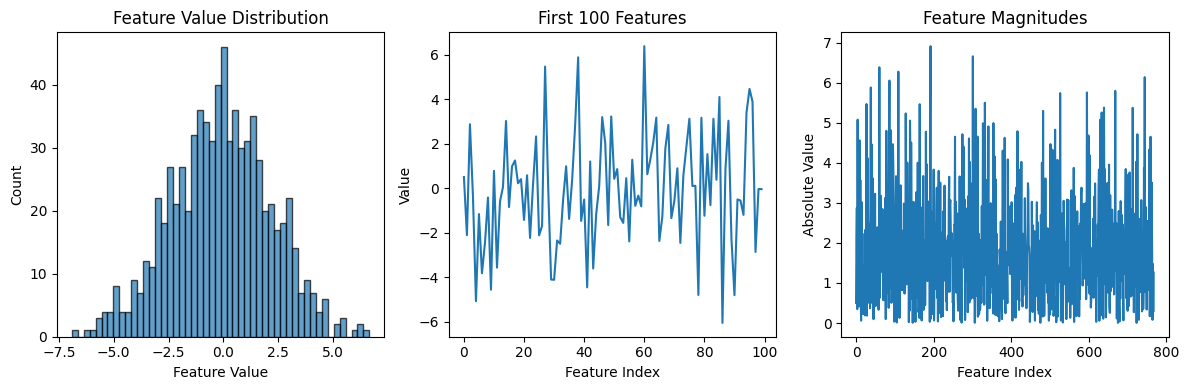

In [7]:
# Analyze features
print("🧠 Feature Analysis:")

features_flat = features.flatten()

print(f"Feature statistics:")
print(f"  Mean: {features_flat.mean():.4f}")
print(f"  Std: {features_flat.std():.4f}")
print(f"  Min: {features_flat.min():.4f}")
print(f"  Max: {features_flat.max():.4f}")
print(f"  Norm: {np.linalg.norm(features_flat):.4f}")

# Plot feature distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(features_flat, bins=50, alpha=0.7, edgecolor='black')
plt.title('Feature Value Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.plot(features_flat[:100])  # First 100 features
plt.title('First 100 Features')
plt.xlabel('Feature Index')
plt.ylabel('Value')

plt.subplot(1, 3, 3)
plt.plot(np.abs(features_flat))
plt.title('Feature Magnitudes')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Value')

plt.tight_layout()
plt.show()

📁 Model Analysis:
Model size: 165.3 MB
Input memory: 3.1 MB (518x518x3 float32)
Output memory: 1.5 KB (768 float16)
Estimated peak memory: ~218.4 MB


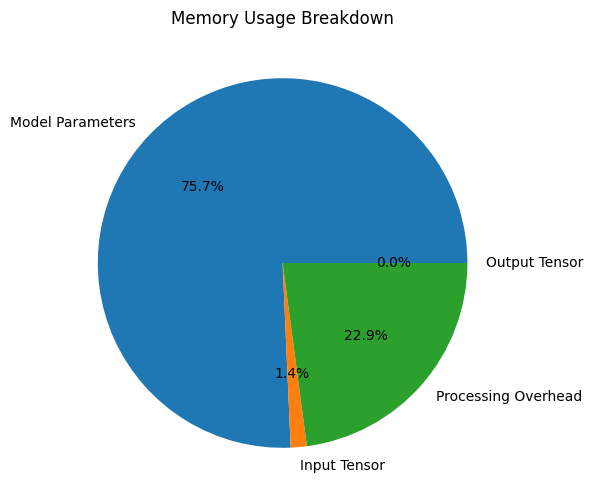


🎉 Evaluation complete!

📋 Summary:
  ⚡ Average inference: 208.3 ms
  🧠 Feature vector: (1, 768)
  📱 Model size: 165.3 MB
  ✅ Ready for iOS/macOS deployment!


In [8]:
# Model size analysis
print("📁 Model Analysis:")

# Calculate model size
if os.path.isdir(model_path):
    total_size = 0
    for root, dirs, files in os.walk(model_path):
        for file in files:
            file_path = os.path.join(root, file)
            total_size += os.path.getsize(file_path)
else:
    total_size = os.path.getsize(model_path)

size_mb = total_size / (1024 * 1024)

print(f"Model size: {size_mb:.1f} MB")
print(f"Input memory: {518*518*3*4/(1024*1024):.1f} MB (518x518x3 float32)")
print(f"Output memory: {768*2/1024:.1f} KB (768 float16)")
print(f"Estimated peak memory: ~{size_mb + 518*518*3*4/(1024*1024) + 50:.1f} MB")

# Memory breakdown chart
memory_components = {
    'Model Parameters': size_mb,
    'Input Tensor': 518*518*3*4/(1024*1024),
    'Processing Overhead': 50,
    'Output Tensor': 768*2/(1024*1024)
}

plt.figure(figsize=(8, 6))
plt.pie(memory_components.values(), labels=memory_components.keys(), autopct='%1.1f%%')
plt.title('Memory Usage Breakdown')
plt.show()

print(f"\n🎉 Evaluation complete!")
print(f"\n📋 Summary:")
print(f"  ⚡ Average inference: {times_ms.mean():.1f} ms")
print(f"  🧠 Feature vector: {features.shape}")
print(f"  📱 Model size: {size_mb:.1f} MB")
print(f"  ✅ Ready for iOS/macOS deployment!")